In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df =pd.read_csv('/Users/vinitkoli/Documents/Data Science Journey/Flip Robo Internship Task /Flip Robo Project Assignment /titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
print( "The dimension of the Dataset",df.shape)
print("\n The column headers in the Datasets:", df.columns)

The dimension of the Dataset (891, 12)

 The column headers in the Datasets: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [4]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df = df.dropna(subset=['Embarked'])
df = df.dropna(subset=['Cabin'])
df.isnull().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age            19
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin           0
Embarked        0
dtype: int64

In [8]:
# Checkin the mean of TotalCharges column
print("The mean value of Age is : ",df["Age"].mean())

The mean value of Age is :  35.6744262295082


In [9]:
# Filling the null values in TotalCharges with its mean
df["Age"] = df["Age"].fillna(df["Age"].mean())

In [10]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [11]:
# Seperating numercial and Categorical columns 

# Checking for Categorical Columns 
categorical_col = []
for i in df.dtypes.index:
    if df.dtypes[i]== "object":
        categorical_col.append(i)
print("Categorical Columns :", categorical_col)
print("\n")  
   
# Checking for Numerical Columns
numerical_col = []
for i in df.dtypes.index:
    if df.dtypes[i]!= "object":
        numerical_col.append(i)
print("Numerical Columns :", numerical_col)
print("\n")

Categorical Columns : ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


Numerical Columns : ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']




In [12]:
# Checking the unique values in the columns 
df.nunique().to_frame("No. of Unique values")

,No. of Unique values
PassengerId,202
Survived,2
Pclass,3
Name,202
Sex,2
Age,64
SibSp,4
Parch,4
Ticket,141
Fare,99


In [13]:
# Satistical summary of Numerical columns 
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,455.495050,0.663366,1.198020,35.674426,0.445545,0.440594,76.103301
std,249.704228,0.473732,0.528205,14.886128,0.630490,0.732294,74.759941
min,2.000000,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,263.250000,0.000000,1.000000,25.000000,0.000000,0.000000,28.959375
50%,457.500000,1.000000,1.000000,35.674426,0.000000,0.000000,55.000000
75%,681.500000,1.000000,1.000000,46.750000,1.000000,1.000000,89.776050
max,890.000000,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


## Univariate Analysis

Survived
1    134
0     68
Name: count, dtype: int64


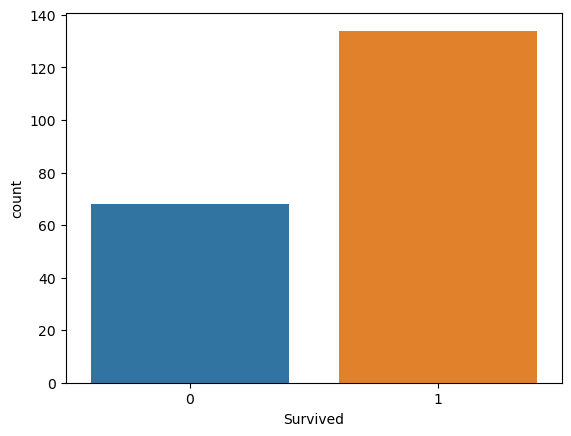

In [14]:
# Visualize the number of Churned Customer 
ax = sns.countplot(x='Survived',data=df)
print(df['Survived'].value_counts())

Age
35.674426    19
36.000000    11
24.000000     9
19.000000     6
35.000000     6
             ..
71.000000     1
3.000000      1
1.000000      1
36.500000     1
26.000000     1
Name: count, Length: 64, dtype: int64


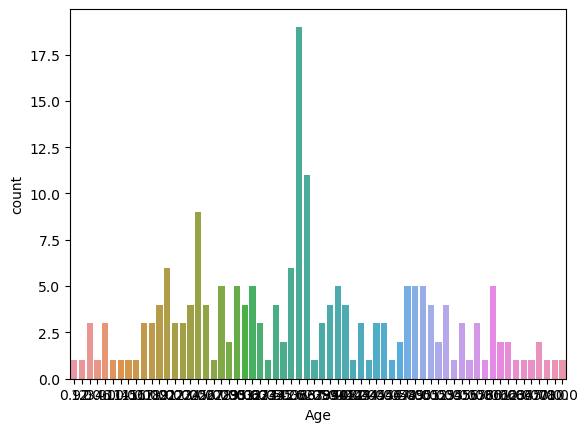

In [15]:
ax = sns.countplot(x='Age',data=df)
print(df['Age'].value_counts())

Pclass
1    174
2     16
3     12
Name: count, dtype: int64


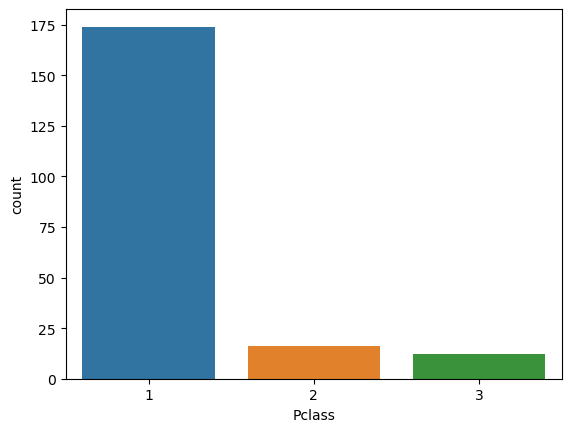

In [16]:
ax = sns.countplot(x='Pclass',data=df)
print(df['Pclass'].value_counts())

SibSp
0    124
1     69
2      6
3      3
Name: count, dtype: int64


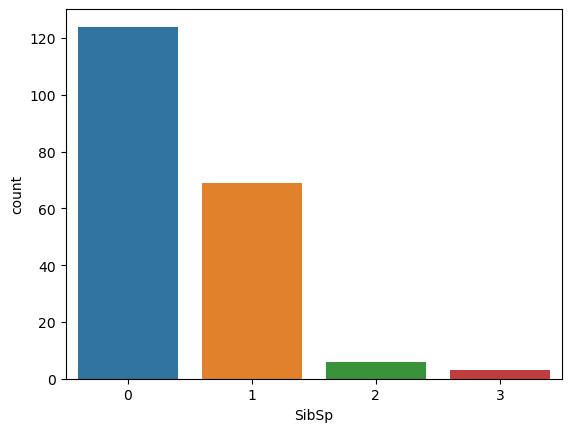

In [17]:
ax = sns.countplot(x='SibSp',data=df)
print(df['SibSp'].value_counts())

Parch
0    139
1     39
2     23
4      1
Name: count, dtype: int64


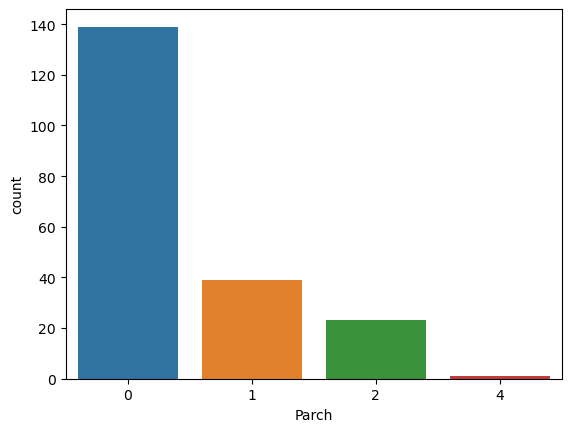

In [18]:
ax = sns.countplot(x='Parch',data=df)
print(df['Parch'].value_counts())

Sex
male      107
female     95
Name: count, dtype: int64


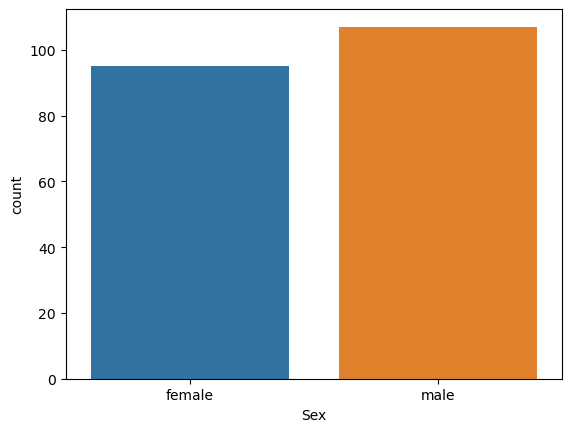

In [19]:
ax = sns.countplot(x='Sex',data=df)
print(df['Sex'].value_counts())

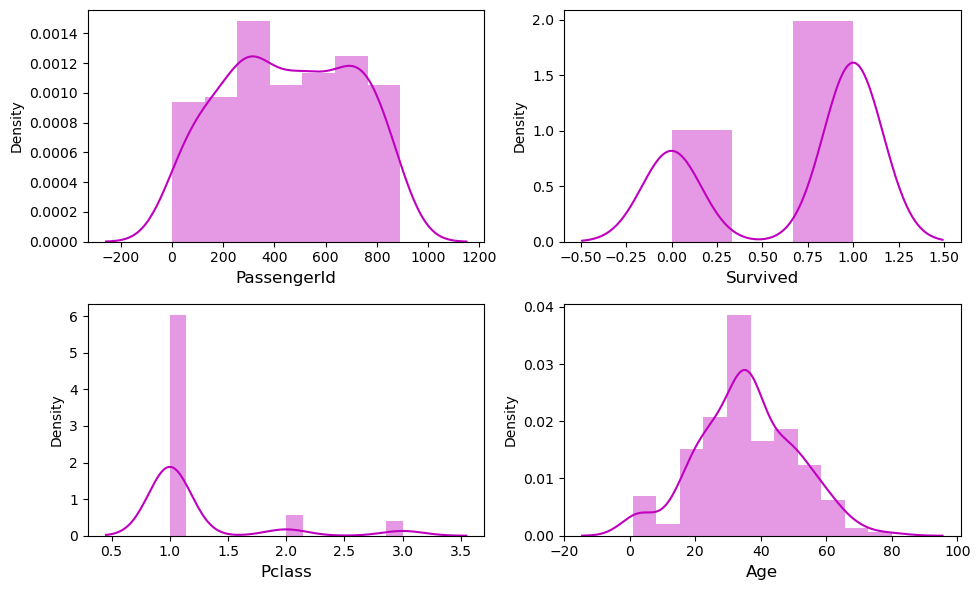

In [20]:
# Checking the distribution of the data 

plt.figure(figsize = (10,6), facecolor="white" )
plotnumber = 1 
for col in numerical_col:
    if plotnumber <=4:
        ax = plt.subplot(2,2,plotnumber)
        sns.distplot(df[col],color ="m")
        plt.xlabel(col, fontsize = 12 )
        plt.yticks(rotation = 0 , fontsize = 10)
    plotnumber += 1
plt.tight_layout()

# Bivariate Analysis

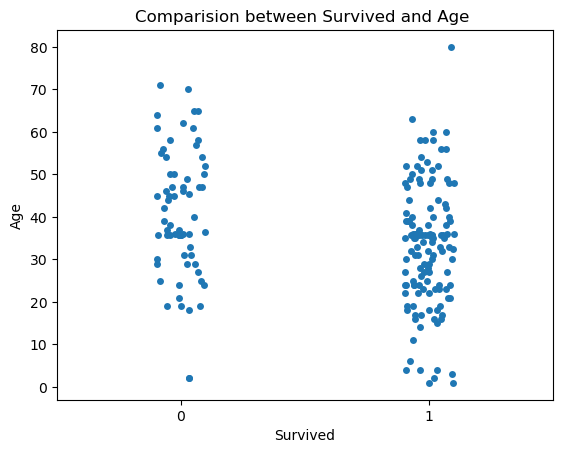

In [21]:
plt.title("Comparision between Survived and Age ")
sns.stripplot(x="Survived", y="Age",data= df)
plt.show()

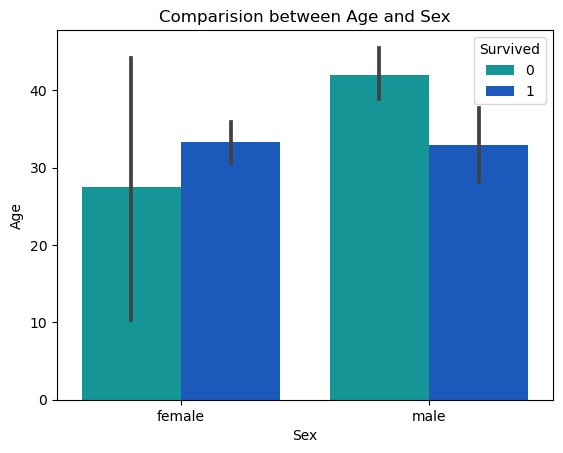

In [22]:
plt.title("Comparision between Age and Sex")
sns.barplot(x="Sex", y="Age",data= df, palette ='winter_r', hue = 'Survived')
plt.show()

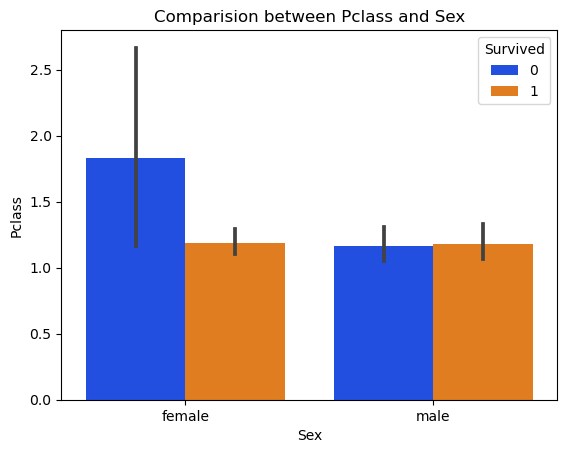

In [23]:
plt.title("Comparision between Pclass and Sex")
sns.barplot(x="Sex", y="Pclass",data= df, palette ='bright', hue = 'Survived')
plt.show()

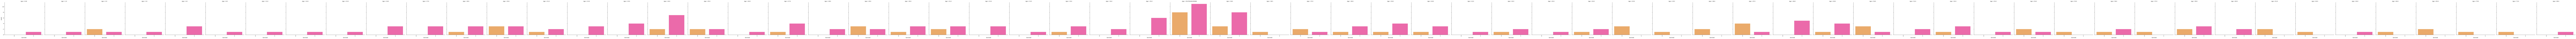

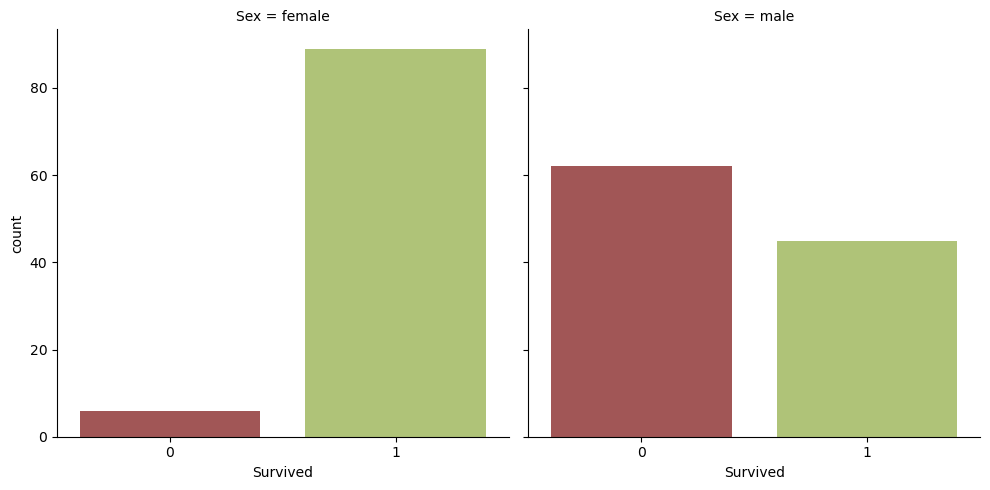

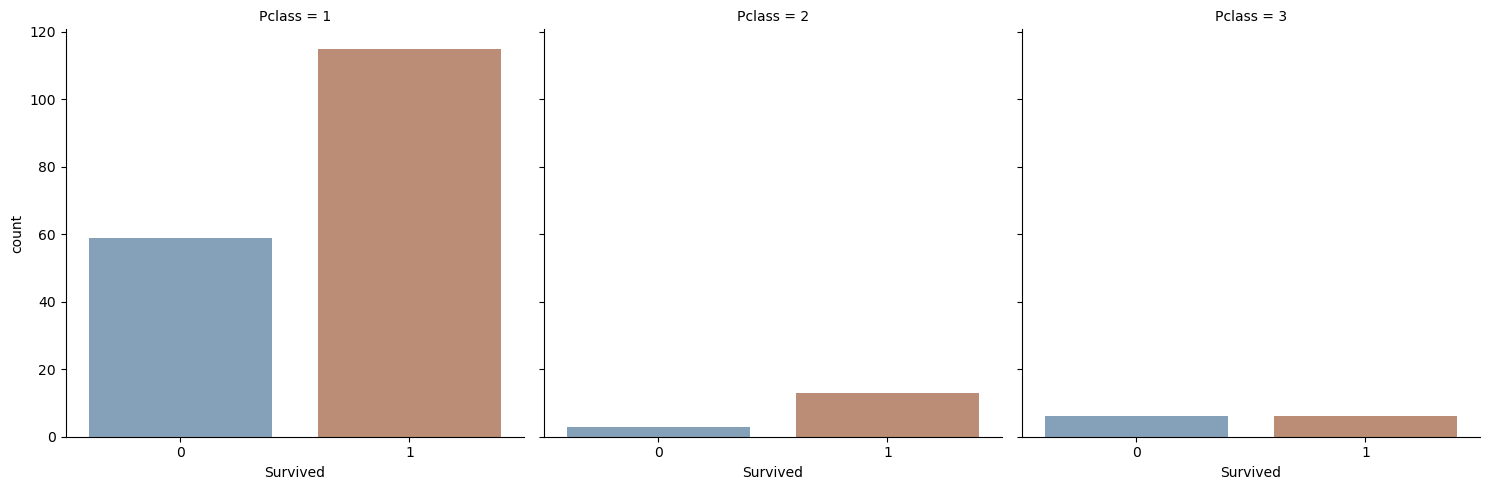

In [24]:
sns.catplot(x='Survived', col = 'Age', data =df, kind ='count',palette ="spring_r")


sns.catplot(x='Survived', col = 'Sex', data =df, kind ='count',palette ="tab20b_r")


sns.catplot(x='Survived', col = 'Pclass', data =df, kind ='count',palette ="twilight_shifted")

plt.show()

# Multivariate Analysis

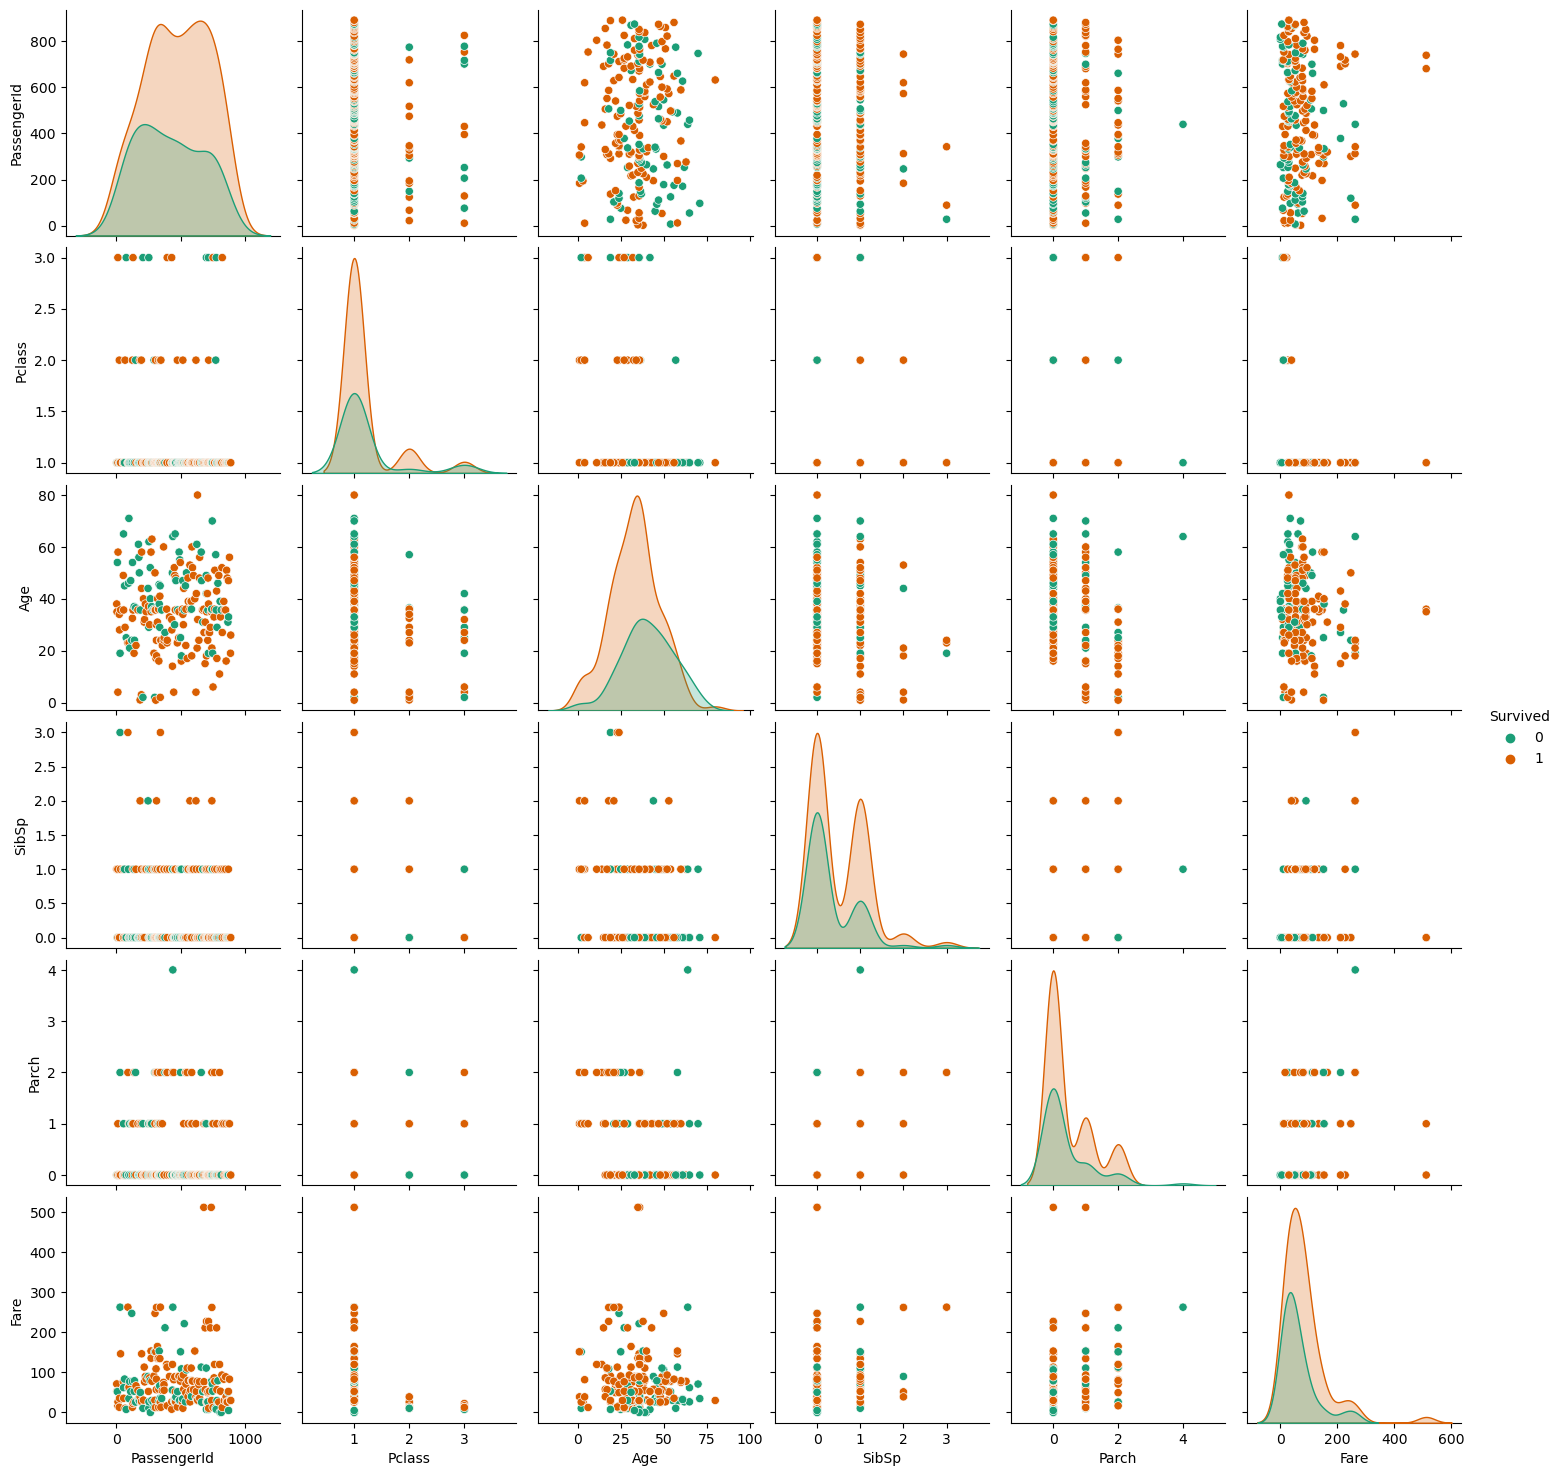

In [25]:
sns.pairplot(df,hue="Survived", palette = "Dark2")
plt.show()

# Checkiing for Outliers 

KeyError: 0

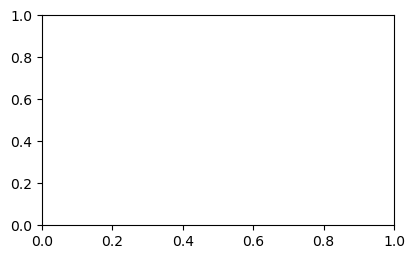

In [40]:
# Lets check for the outliers by plotting boxplot 

plt.figure(figsize = (10,6), facecolor="white" )
plotnumber = 1 
for col in numerical_col:
    if plotnumber <=5:
        ax = plt.subplot(2,2,plotnumber)
        sns.boxplot(df[col],palette ="Set2_r")
        plt.xlabel(col, fontsize = 15 )
        plt.yticks(rotation = 0 , fontsize = 10)
    plotnumber += 1
plt.tight_layout()

# Checking Skewness 

In [28]:
# encoding categorical Columns using Orfinal Encoder 
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()

for i in df.columns:
    if df[i].dtypes == "object":
        df[i] = OE.fit_transform(df[i].values.reshape(-1,1))
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,51.0,0.0,38.0,1,0,123.0,71.2833,80.0,0.0
3,4,1,1,74.0,0.0,35.0,1,0,36.0,53.1000,54.0,2.0
6,7,0,1,122.0,1.0,54.0,0,0,62.0,51.8625,128.0,2.0
10,11,1,3,161.0,0.0,4.0,1,1,134.0,16.7000,144.0,2.0
11,12,1,1,27.0,0.0,58.0,0,0,31.0,26.5500,48.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,18.0,0.0,47.0,1,1,38.0,52.5542,101.0,2.0
872,873,0,1,35.0,1.0,33.0,0,0,102.0,5.0000,33.0,2.0
879,880,1,1,151.0,0.0,56.0,0,1,43.0,83.1583,69.0,0.0
887,888,1,1,80.0,0.0,19.0,0,0,10.0,30.0000,29.0,2.0


In [29]:
df.skew()

PassengerId   -0.042920
Survived      -0.696596
Pclass         2.629466
Name           0.000000
Sex           -0.119914
Age            0.010158
SibSp          1.470303
Parch          1.628296
Ticket        -0.034577
Fare           2.733548
Cabin         -0.004059
Embarked      -0.626687
dtype: float64

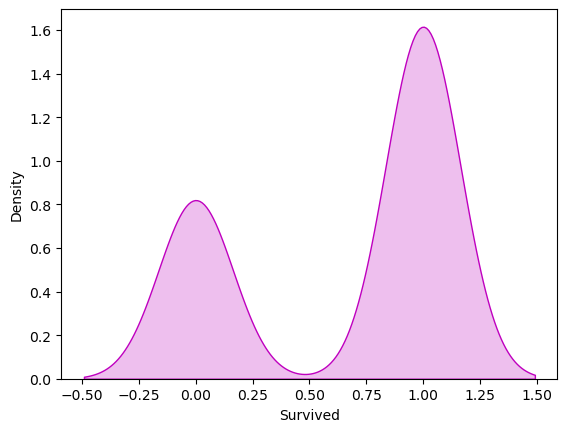

In [30]:
sns.distplot(df['Survived'],color="m", kde_kws = {"shade" : True}, hist=False)
plt.show()

# Encoding  Categorial Column

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 202 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  202 non-null    int64  
 1   Survived     202 non-null    int64  
 2   Pclass       202 non-null    int64  
 3   Name         202 non-null    float64
 4   Sex          202 non-null    float64
 5   Age          202 non-null    float64
 6   SibSp        202 non-null    int64  
 7   Parch        202 non-null    int64  
 8   Ticket       202 non-null    float64
 9   Fare         202 non-null    float64
 10  Cabin        202 non-null    float64
 11  Embarked     202 non-null    float64
dtypes: float64(7), int64(5)
memory usage: 28.6 KB


In [32]:
df.describe()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,455.495050,0.663366,1.198020,100.500000,0.529703,35.674426,0.445545,0.440594,70.386139,76.103301,75.663366,1.297030
std,249.704228,0.473732,0.528205,58.456537,0.500357,14.886128,0.630490,0.732294,40.506979,74.759941,41.898308,0.946789
min,2.000000,0.000000,1.000000,0.000000,0.000000,0.920000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,263.250000,0.000000,1.000000,50.250000,0.000000,25.000000,0.000000,0.000000,36.250000,28.959375,40.250000,0.000000
50%,457.500000,1.000000,1.000000,100.500000,1.000000,35.674426,0.000000,0.000000,71.500000,55.000000,74.500000,2.000000
75%,681.500000,1.000000,1.000000,150.750000,1.000000,46.750000,1.000000,1.000000,105.750000,89.776050,112.750000,2.000000
max,890.000000,1.000000,3.000000,201.000000,1.000000,80.000000,3.000000,4.000000,140.000000,512.329200,145.000000,2.000000


# Corelation between target variable and independent variable 

In [33]:
# Checking the correlation between features and the target 
cor =df.corr()
cor

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,1.000000,0.111985,-0.084147,-0.058764,0.000877,0.029123,-0.081137,-0.064538,-0.028354,0.017465,-0.072897,0.031825
Survived,0.111985,1.000000,-0.030513,-0.140849,-0.545297,-0.240243,0.138202,0.042456,0.062549,0.128261,0.038628,-0.130910
Pclass,-0.084147,-0.030513,1.000000,0.188841,-0.060014,-0.284479,-0.086972,0.056288,0.266371,-0.311740,0.494000,0.170303
Name,-0.058764,-0.140849,0.188841,1.000000,0.025089,0.051552,-0.144031,-0.014586,0.031281,-0.123575,0.138620,-0.021035
Sex,0.000877,-0.545297,-0.060014,0.025089,1.000000,0.176238,-0.152552,-0.110574,-0.095319,-0.137185,-0.083768,0.096805
Age,0.029123,-0.240243,-0.284479,0.051552,0.176238,1.000000,-0.151819,-0.266001,-0.023060,-0.089815,-0.132331,-0.084004
SibSp,-0.081137,0.138202,-0.086972,-0.144031,-0.152552,-0.151819,1.000000,0.262348,0.006282,0.291777,0.056745,0.002228
Parch,-0.064538,0.042456,0.056288,-0.014586,-0.110574,-0.266001,0.262348,1.000000,-0.016498,0.384970,0.001291,0.061455
Ticket,-0.028354,0.062549,0.266371,0.031281,-0.095319,-0.023060,0.006282,-0.016498,1.000000,0.206382,0.158330,-0.258951
Fare,0.017465,0.128261,-0.311740,-0.123575,-0.137185,-0.089815,0.291777,0.384970,0.206382,1.000000,-0.262818,-0.239213


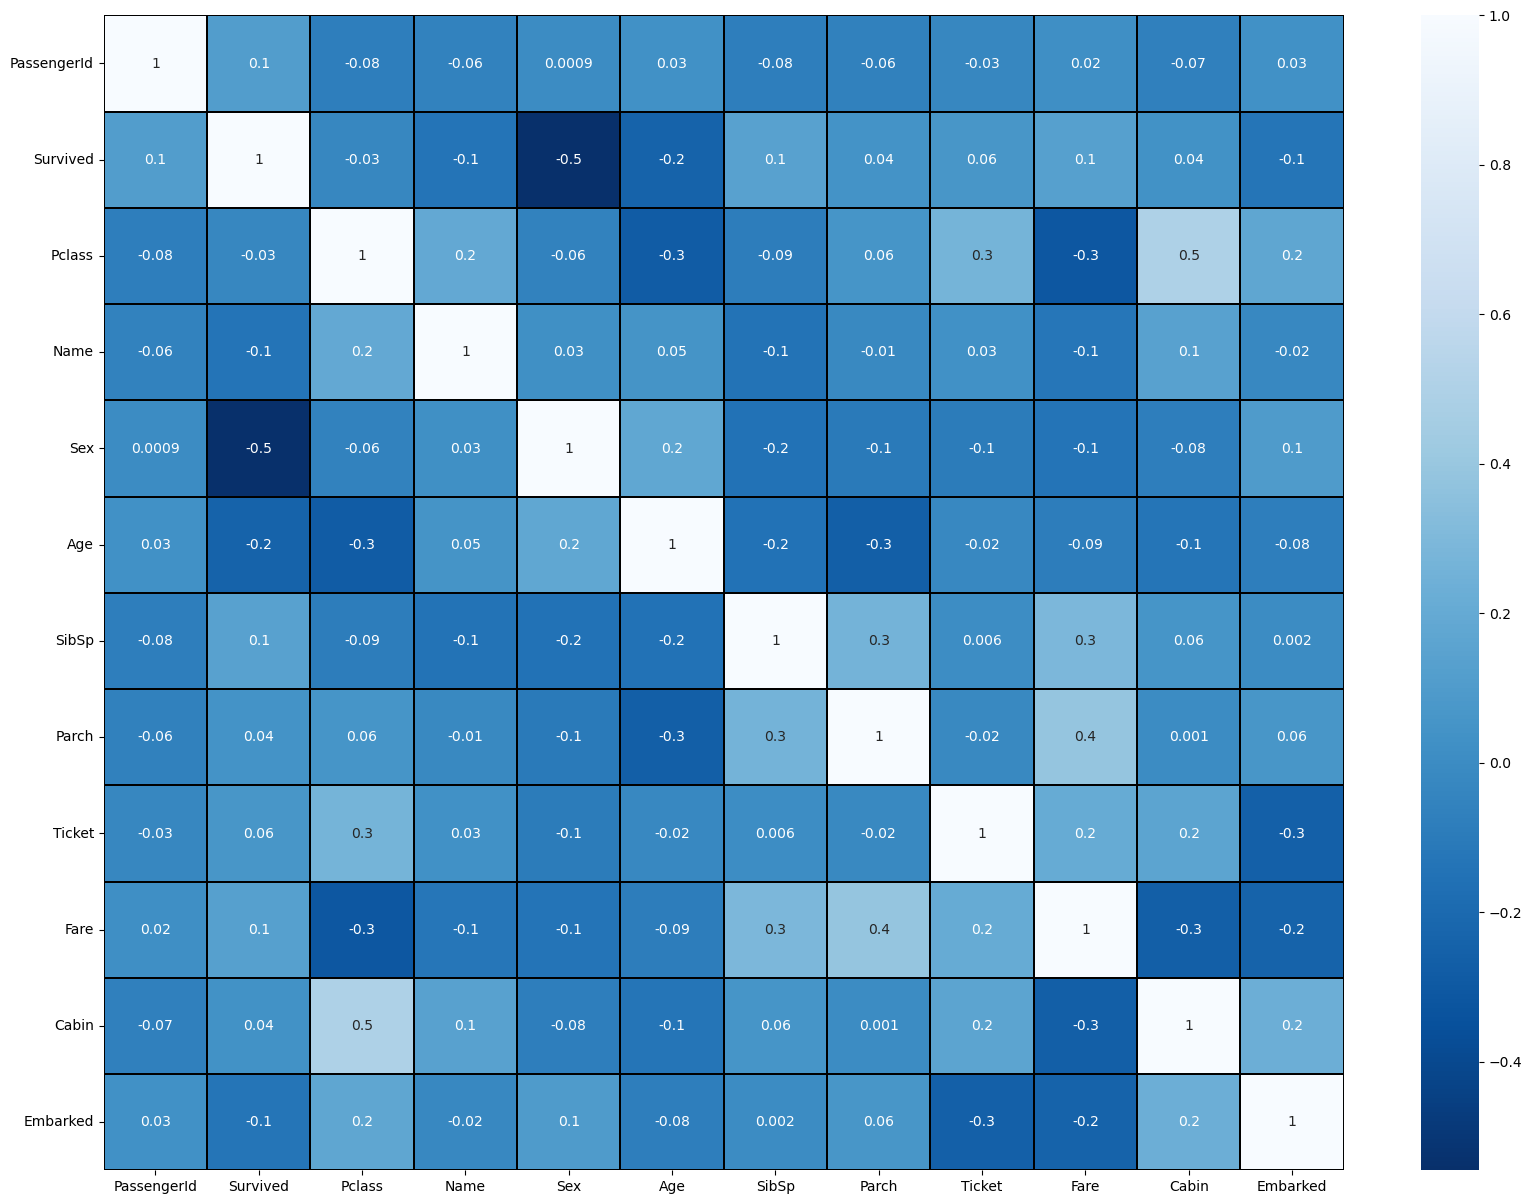

In [34]:
# Visualizing the correlation matrix by plotting heatmap
plt.figure(figsize =(20,15))
sns.heatmap(df.corr(), linewidths = 0.1, fmt = ".1g", linecolor = "black", annot = True, cmap ="Blues_r")
plt.yticks(rotation = 0);
plt.show()

In [35]:
# Corrleation with all the columns with Target variable 
cor['Survived'].sort_values(ascending = False)

Survived       1.000000
SibSp          0.138202
Fare           0.128261
PassengerId    0.111985
Ticket         0.062549
Parch          0.042456
Cabin          0.038628
Pclass        -0.030513
Embarked      -0.130910
Name          -0.140849
Age           -0.240243
Sex           -0.545297
Name: Survived, dtype: float64

In [42]:
# Seperating Features and Labels 

x = df.drop("Survived", axis = 1)
y = df["Survived"]

# Feature Scaling using Standard Scalarization 


In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,-1.820641,-0.375823,-0.848887,-1.061280,0.156612,0.881589,-0.603158,1.302111,-0.064633,0.103761,-1.373329
1,-1.812612,-0.375823,-0.454455,-1.061280,-0.045418,0.881589,-0.603158,-0.851003,-0.308460,-0.518331,0.744323
2,-1.800568,-0.375823,0.368708,0.942258,1.234109,-0.708420,-0.603158,-0.207544,-0.325054,1.252238,0.744323
3,-1.784509,3.419989,1.037528,-1.061280,-2.133068,0.881589,0.765807,1.574344,-0.796561,1.635064,0.744323
4,-1.780494,-0.375823,-1.260468,-1.061280,1.503483,-0.708420,-0.603158,-0.974745,-0.664479,-0.661891,0.744323
...,...,...,...,...,...,...,...,...,...,...,...
197,1.672137,-0.375823,-1.414811,-1.061280,0.762704,0.881589,0.765807,-0.801506,-0.315779,0.606220,0.744323
198,1.676152,-0.375823,-1.123274,0.942258,-0.180105,-0.708420,-0.603158,0.782394,-0.953451,-1.020790,0.744323
199,1.704255,-0.375823,0.866036,-1.061280,1.368796,-0.708420,0.765807,-0.677764,0.094603,-0.159432,-1.373329
200,1.736372,-0.375823,-0.351559,-1.061280,-1.122915,-0.708420,-0.603158,-1.494463,-0.618217,-1.116496,0.744323


# Checking Variance Inflation Factor ( VIF) 

In [44]:
# Finding Variance inflation factor in each scaled column i.e x.shape[1](1/1-R2)

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"] = x.columns
vif

,VIF values,Features
0,1.025750,PassengerId
1,1.796144,Pclass
2,1.079781,Name
3,1.082486,Sex
4,1.233390,Age
5,1.205233,SibSp
6,1.361002,Parch
7,1.364459,Ticket
8,1.725014,Fare
9,1.454682,Cabin


In [45]:
y.value_counts()

Survived
1    134
0     68
Name: count, dtype: int64

# Oversampling 

In [46]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x1,y1 = SM.fit_resample(x,y)

In [47]:
y1.value_counts()

Survived
1    134
0    134
Name: count, dtype: int64

# Modeling 


In [48]:
# finding the best random state 

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score 
maxAccu = 0
maxRS = 0 
for i in range (1,200):
    x_train,x_test,y_train,y_test = train_test_split(x1,y1, test_size = 0.30, random_state = i)
    RFR = RandomForestClassifier()
    RFR.fit(x_train,y_train)
    pred = RFR.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print("Best Accuracy is ", maxAccu, "at random_state", maxRS)

Best Accuracy is  0.9259259259259259 at random_state 117


In [49]:
# Creating train test split 

x_train,x_test,y_train,y_test =train_test_split (x1,y1, test_size = 0.30, random_state = maxRS )

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC


In [51]:
# Checking accurancy for RandomForestClassifier 

RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC = RFC.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))

0.8888888888888888
[[44  4]
 [ 5 28]]
              precision    recall  f1-score   support

           0       0.90      0.92      0.91        48
           1       0.88      0.85      0.86        33

    accuracy                           0.89        81
   macro avg       0.89      0.88      0.88        81
weighted avg       0.89      0.89      0.89        81



In [55]:
LR = LogisticRegression()
LR.fit(x_train,y_train)
predLR = LR.predict(x_test)
print(accuracy_score(y_test,predLR))
print(confusion_matrix(y_test,predLR))
print(classification_report(y_test,predLR))

0.8271604938271605
[[41  7]
 [ 7 26]]
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        48
           1       0.79      0.79      0.79        33

    accuracy                           0.83        81
   macro avg       0.82      0.82      0.82        81
weighted avg       0.83      0.83      0.83        81



In [57]:
ETC = ExtraTreesClassifier()
ETC.fit(x_train,y_train)
predETC = ETC.predict(x_test)
print(accuracy_score(y_test,predETC))
print(confusion_matrix(y_test,predETC))
print(classification_report(y_test,predETC))

0.9012345679012346
[[44  4]
 [ 4 29]]
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        48
           1       0.88      0.88      0.88        33

    accuracy                           0.90        81
   macro avg       0.90      0.90      0.90        81
weighted avg       0.90      0.90      0.90        81



In [58]:
BC = BaggingClassifier()
BC.fit(x_train,y_train)
predBC = BC.predict(x_test)
print(accuracy_score(y_test,predBC))
print(confusion_matrix(y_test,predBC))
print(classification_report(y_test,predBC))

0.8641975308641975
[[42  6]
 [ 5 28]]
              precision    recall  f1-score   support

           0       0.89      0.88      0.88        48
           1       0.82      0.85      0.84        33

    accuracy                           0.86        81
   macro avg       0.86      0.86      0.86        81
weighted avg       0.87      0.86      0.86        81



# Cross Validation Score 

In [52]:
from sklearn.model_selection import cross_val_score

In [53]:
# Checking Cv score for Random Forest Classifier 
score = cross_val_score(RFC,x1,y1)
print(score)
print(score.mean())
print("Difference between Accurancy score and cross validation score is - ", accuracy_score(y_test,predRFC)-score.mean())

[0.81481481 0.81481481 0.57407407 0.77358491 0.8490566 ]
0.7652690426275333
Difference between Accurancy score and cross validation score is -  0.12361984626135558


In [56]:
# Checking Cv score for Logistic Regression
score = cross_val_score(LR,x1,y1)
print(score)
print(score.mean())
print("Difference between Accurancy score and cross validation score is - ", accuracy_score(y_test,predLR)-score.mean())

[0.77777778 0.88888889 0.66666667 0.77358491 0.79245283]
0.779874213836478
Difference between Accurancy score and cross validation score is -  0.04728627999068247


In [59]:
# Checking Cv score for Extra Tree Classifier 
score= cross_val_score(ETC,x1,y1)
print(score)
print(score.mean())
print("Difference between Accurancy score and cross validation score is - ", accuracy_score(y_test,predETC)-score.mean())

[0.81481481 0.83333333 0.7037037  0.79245283 0.90566038]
0.8099930118798044
Difference between Accurancy score and cross validation score is -  0.09124155602143014


# Hyper Parameter tunnning 

In [60]:
# ExtraTree Classifer 
from sklearn.model_selection import GridSearchCV

parameters = {
    'criterion': ['gini', 'entropy'],
    'random_state': [10, 50, 1000],
    'max_depth': [None, 10, 20],  # None means no maximum depth limit
    'n_jobs': [-2, -1, 1],
    'n_estimators': [50, 100, 200, 300]
}


In [61]:
GCV = GridSearchCV(ExtraTreesClassifier(), parameters, cv = 5)

In [62]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 1000]})

In [63]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': None,
 'n_estimators': 200,
 'n_jobs': -2,
 'random_state': 10}

In [64]:
# Creating same Grid search and changing the parameters 
Final_model = ExtraTreesClassifier(criterion='entropy', max_depth =10, n_estimators = 100 , n_jobs = -2, random_state = 50)
Final_model.fit(x_train,y_train)
pred = Final_model.predict(x_test)
acc = accuracy_score(y_test,pred)
print(acc*100)

87.65432098765432


# Plottinf ROC and Compare AUC for all models used 

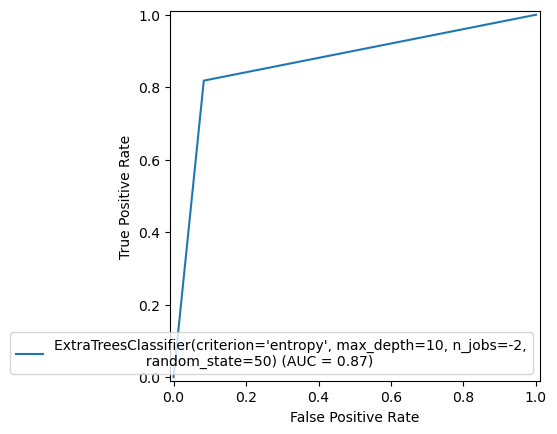

In [65]:
from sklearn import metrics
fpr,tpr,threshold = metrics.roc_curve(y_test,pred)
roc_auc = metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc, estimator_name = Final_model)
display.plot()

# Saving the Model 

In [66]:
# Saving the model using .pk1 (.pk means P library)
 
import joblib
joblib.dump(Final_model, "Titanic_survived.pk1")

['Titanic_survived.pk1']

In [67]:
# Lets Load the saved model and get the prediction 
model = joblib.load("Titanic_survived.pk1")

# Prediction 
prediction = model.predict(x_test)
prediction 

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0])

In [68]:
a = np.array(y_test)
df = pd.DataFrame()
df["Prediction"] = prediction
df["Original"] = a
df

,Prediction,Original
0,0,0
1,0,1
2,0,0
3,0,0
4,1,0
...,...,...
76,0,0
77,1,1
78,0,0
79,1,0
